# Libraries and Utilities

In [1]:
#Import Libarires
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import datetime
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
color = sns.color_palette()

# Load and Check Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
ED = pd.read_csv('/content/data.csv',encoding='unicode_escape')
#'utf-8' codec can't decode byte
ED.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
print('DataFrame_Dimention :' , ED.shape)

DataFrame_Dimention : (541909, 8)


In [5]:
ED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# CustomerID Dtype is float ===> must be str
# InviceID Dtype is float ====> must be str

In [7]:
ED = pd.read_csv('/content/data.csv',encoding='unicode_escape',
                 dtype ={'CustomerID' : str , 'InvoiceID' : str})

In [8]:
#InvoiceDate Dtype is object ===> must be datetime
ED['InvoiceDate'] = pd.to_datetime(ED['InvoiceDate'])
ED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
ED.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [10]:
pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 27.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cc7fb7087ec399825d77a1faabe9634babca4be4e199b4f9f8768b28c0a716e8
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempti

In [11]:
from pandas_profiling import ProfileReport
profile = ProfileReport(ED, title = 'Pandas Profiling Report of Ecommerce Dat')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Missing_Values
print(ED.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [13]:
#Duplicat_Values 
print(ED.duplicated().sum())

5268


In [14]:
ED.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [15]:
ED.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [16]:
ED.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
temp = ED[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False) # Merge to Not Merge (like DB)
countries = temp['Country'].value_counts()

In [18]:
data = dict(type='choropleth', locations = countries.index, locationmode = 'country names', z = countries, text = countries.index,
            colorbar = {'title':'Order nb.'},
            colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']], reversescale = False)
#_______________________
layout = dict(title='Number of orders per country', geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

In [20]:
ED['CustomerID'] = ED['CustomerID'].astype('int64')

In [21]:
#Remove Quantity with negative values
ED = ED[ED.Quantity > 0]

In [22]:
#Add the column - amount_spent
ED['amount_spent'] = ED['Quantity'] * ED['UnitPrice']

# Descriptive Statistics

In [23]:
ED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   InvoiceDate   397924 non-null  datetime64[ns]
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  int64         
 7   Country       397924 non-null  object        
 8   amount_spent  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.4+ MB


**How many orders made by the customers?**

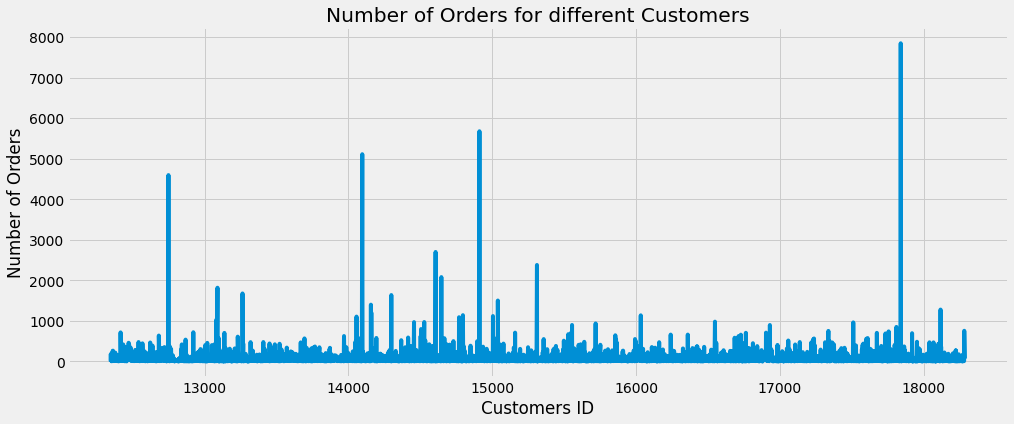

In [24]:
#How many orders made by the customers?
orders = ED.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

**Check TOP 5 most number of orders**

In [25]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


**How much money spent by the customers**

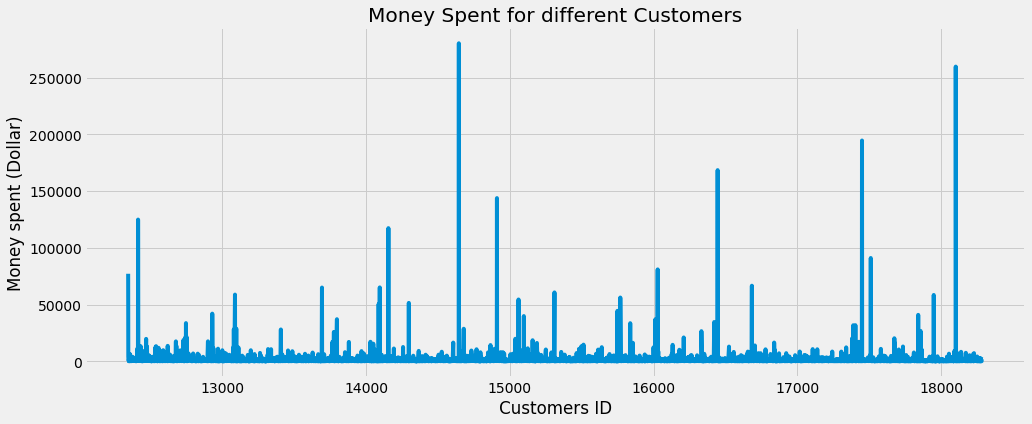

In [26]:
money_spent = ED.groupby(by=['CustomerID','Country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

**Check TOP 5 highest money spent**

In [27]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [28]:
ED

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


**Add the columns - Month, Day and Hour for the invoice**

In [29]:
# rearrange all the columns for easy reference
ED_new = ED[['InvoiceNo','InvoiceDate','StockCode','Description',
                 'Quantity','UnitPrice','amount_spent','CustomerID','Country']]

In [30]:
ED_new.insert(loc=2, column='year_month', value=ED_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))
ED_new.insert(loc=3, column='month', value=ED_new.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
ED_new.insert(loc=4, column='day', value=(ED_new.InvoiceDate.dt.dayofweek)+1)
ED_new.insert(loc=5, column='hour', value=ED_new.InvoiceDate.dt.hour)

In [31]:
ED_new.head()

,InvoiceNo,InvoiceDate,year_month,month,day,hour,StockCode,Description,Quantity,UnitPrice,amount_spent,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [32]:
# Item sale with Quantity <=0 or unitPrice < 0
print (((ED_new['Quantity'] <= 0) | (ED_new['UnitPrice'] < 0)).value_counts())

#Delete the negative values 
ED_new = ED_new.loc[(ED_new['Quantity'] > 0) | (ED_new['UnitPrice'] >= 0)]

False    397924
dtype: int64


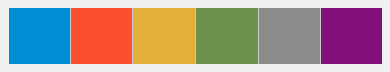

In [33]:
sns.palplot(color)

**How many orders (per month)?**

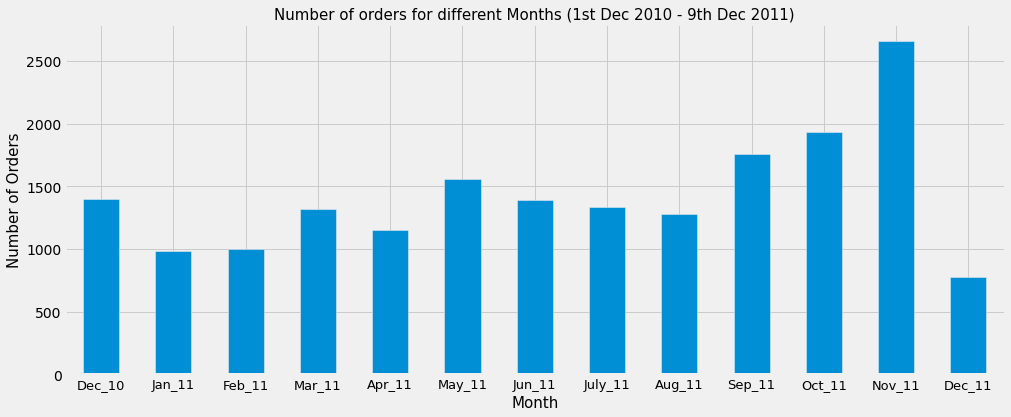

In [34]:
ax = ED_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11',
                    'Sep_11','Oct_11','Nov_11','Dec_11'),rotation='horizontal', fontsize=13)
plt.show()

**How many orders (per day)?**

In [35]:
ED_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index

<bound method Series.sort_index of [4]    4033
[3]    3455
[2]    3185
[1]    2863
[5]    2831
[7]    2169
Name: day, dtype: int64>

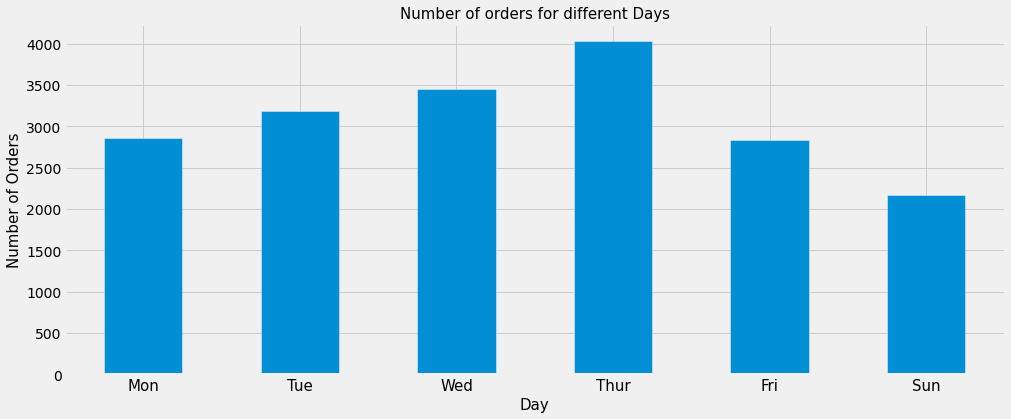

In [36]:
ax2 = ED_new.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind ='bar',color=color[0],figsize=(15,6))
ax2.set_xlabel('Day',fontsize=15)
ax2.set_ylabel('Number of Orders',fontsize=15)
ax2.set_title('Number of orders for different Days',fontsize=15)
ax2.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

**How many orders (per hour)?**

In [37]:
%%timeit

ED['yearmonth'] = ED['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
ED['Week'] = ED['InvoiceDate'].apply(lambda x: x.strftime('%W'))
ED['day'] = ED['InvoiceDate'].apply(lambda x: x.strftime('%d'))
ED['Weekday'] = ED['InvoiceDate'].apply(lambda x: x.strftime('%w'))
ED['hour'] = ED['InvoiceDate'].apply(lambda x: x.strftime('%H'))

10 s ± 563 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


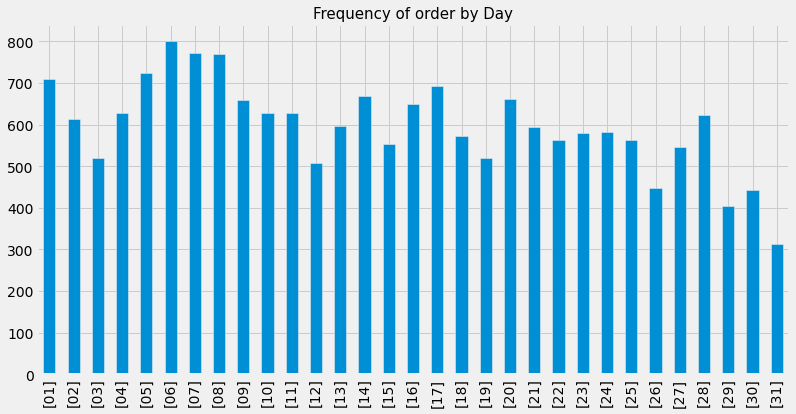

In [38]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = ED.groupby(['InvoiceNo'])['day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

**Discover patterns for each Country**

**How many orders for each country?**

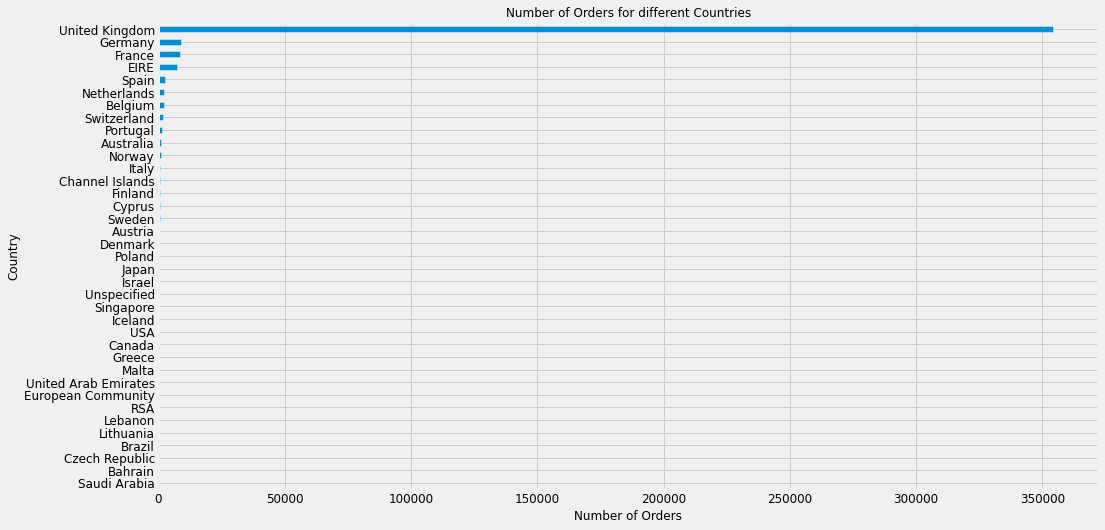

In [39]:
group_country_orders = ED_new.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()